## Code along - CNN

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#cifar100 for 100 instead of 10 classes
from tensorflow.keras.datasets.cifar10 import load_data

In [49]:
help(load_data)

Help on function load_data in module keras.src.datasets.cifar10:

load_data()
    Loads the CIFAR10 dataset.
    
    This is a dataset of 50,000 32x32 color training images and 10,000 test
    images, labeled over 10 categories. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    The classes are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | airplane    |
    |   1   | automobile  |
    |   2   | bird        |
    |   3   | cat         |
    |   4   | deer        |
    |   5   | dog         |
    |   6   | frog        |
    |   7   | horse       |
    |   8   | ship        |
    |   9   | truck       |
    
    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(50000, 32, 32, 3)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **`y_train`**: `uint8` NumPy array of l

In [50]:
(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [51]:
"""50000 images, 32x32 for each image with 3 color channels (RGB)"""
x_train.shape

(50000, 32, 32, 3)

In [52]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [53]:
"""remove extra dimension"""
y_train, y_test= y_train.ravel(), y_test.ravel()

In [54]:
y_train.shape

(50000,)

In [55]:
labels= [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

labels_dict = {i: label for i, label in enumerate(labels)}
labels_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

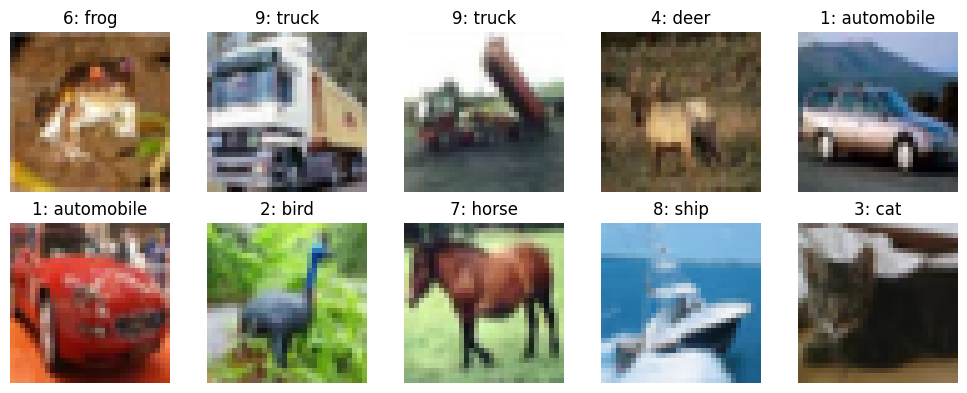

In [56]:
fig, axes = plt.subplots(2, 5, figsize=(10,4))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")

fig.tight_layout()

In [19]:
x_train[i].shape

(32, 32, 3)

In [21]:
x_train[1].flatten().min(), x_train[1].flatten().max()

(5, 254)

In [24]:
scaled_X_train= x_train.astype("float32")/ 255
scaled_X_test= x_test.astype("float32")/ 255

In [26]:
scaled_X_train.flatten().min(), scaled_X_train.flatten().max()

(0.0, 1.0)

## CNN model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

In [44]:
def cnn_model(learning_rate=0.001, dropout_rate=0.5, kernels=[32, 64]):
    """This is a optimmizer is used for learning"""
    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name="CNN_model")

    """convolutional and subsampling layers"""
    for kernel in kernels:
        conv_layer = Conv2D(
            kernel, # number of kernels in each layer
            kernel_size=(3, 3), # also (5,5), (7,7) available
            activation="relu",  # good starting point
            kernel_initializer="he_normal", # initializing weights, good to use with relu
            input_shape= x_train.shape[1:]  # 32x32x3
        )
        
        model.add(conv_layer)
        model.add(MaxPooling2D(pool_size= [2,2], strides= 2))   # these can also be tuned
    
    """MLP part"""
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(250, activation= "relu", kernel_initializer= "he_normal"))
    model.add(Dense(10, activation= "softmax"))
    
    model.compile(loss= "sparse_categorical_crossentropy", optimizer= adam, metrics= ["acc"])
    
    return model

model= cnn_model(kernels= [32, 64, 32])
model.summary()

Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 250)            │        32,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         2,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,616 (283.66 KB)

 Trainable params: 72,616 (283.66 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15)

model.fit(
    scaled_X_train,
    y_train,
    epochs=100,
    callbacks=[early_stopper],
    validation_split=1 / 3,
)

Epoch 1/100
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - acc: 0.2269 - loss: 2.0417 - val_acc: 0.4473 - val_loss: 1.5192
Epoch 2/100
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - acc: 0.4148 - loss: 1.5739 - val_acc: 0.4958 - val_loss: 1.3656
Epoch 3/100
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - acc: 0.4878 - loss: 1.4102 - val_acc: 0.5408 - val_loss: 1.2625
Epoch 4/100
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - acc: 0.5262 - loss: 1.3086 - val_acc: 0.5792 - val_loss: 1.1914
Epoch 5/100
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - acc: 0.5471 - loss: 1.2536 - val_acc: 0.5868 - val_loss: 1.1439
Epoch 6/100
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - acc: 0.5633 - loss: 1.1978 - val_acc: 0.6026 - val_loss: 1.0992
Epoch 7/100
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - acc: 0.5862 - loss: 1.1613 - val_acc: 0.6176 - val_loss: 1.0801
Epoch 8/100
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - acc: 0.5930 - loss: 1.1192 - val_acc: 0.6255 - val_loss: 1.0575
Epoch 9/100
1042

In [46]:
metrics= pd.DataFrame(model.history.history)

metrics.head()

,acc,loss,val_acc,val_loss
0,0.295473,1.862753,0.447291,1.519186
1,0.433924,1.530265,0.495830,1.365647
2,0.491525,1.396270,0.540829,1.262507
3,0.525965,1.308377,0.579228,1.191399
4,0.549875,1.246290,0.586788,1.143866


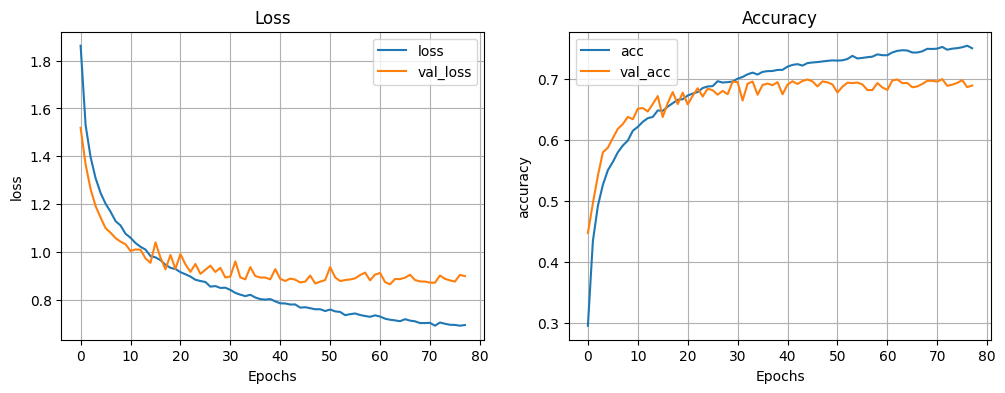

In [48]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel= "Epochs", ylabel= "loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel= "Epochs", ylabel= "accuracy")

plot_metrics(metrics)

## Hyperparameter tuning

- dropout rate
- learning rate
- diffrent network configurations
- which type of pooling layer
- diffrent optimizers
- ...
  

we pick dropout to tune

In [62]:
"""Short patience for demo"""
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience= 3, restore_best_weights= True)  # goes back to the best weight, not using the 15 ones

def evaluate_model(**kwargs):
    model= cnn_model(**kwargs)
    """few epochs for demo"""
    model.fit(
        scaled_X_train,
        y_train,
        epochs=10,
        callbacks=[early_stopper],
        validation_split=1 / 3,
    )
    metrics= pd.DataFrame(model.history.history)
    """gets last epochs validation accuracy"""
    val_acc= metrics["val_acc"].iloc[-1]
    
    return val_acc

In [69]:
dropout_accuracies= {}

for dropout_rate in np.arange(.1, .6, .1):
    dropout_rate= np.round(dropout_rate, 1)
    dropout_accuracies[dropout_rate]= evaluate_model(dropout_rate= dropout_rate)

c:\Users\milto\Documents\skola\Artificial_Intelligence2-Milton-OPA23\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - acc: 0.3906 - loss: 1.6923 - val_acc: 0.5681 - val_loss: 1.2304
Epoch 2/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - acc: 0.6024 - loss: 1.1237 - val_acc: 0.6338 - val_loss: 1.0483
Epoch 3/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - acc: 0.6791 - loss: 0.9258 - val_acc: 0.6569 - val_loss: 0.9829
Epoch 1/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - acc: 0.4097 - loss: 1.6520 - val_acc: 0.6023 - val_loss: 1.1392
Epoch 2/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - acc: 0.6204 - loss: 1.0781 - val_acc: 0.6518 - val_loss: 0.9993
Epoch 3/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - acc: 0.6880 - loss: 0.8954 - val_acc: 0.6609 - val_loss: 0.9791
Epoch 1/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - acc: 0.3667 - loss: 1.7802 - val_acc: 0.5522 - val_loss: 1.2588
Epoch 2/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - acc: 0.5800 - loss: 1.1844 - val_acc: 0.6344 - val_loss: 1.0509
Epoch 3/10
1042/1042 ━━━

<Axes: title={'center': 'Tuning dropouts'}, xlabel='Dropouts', ylabel='Validation accuracy'>

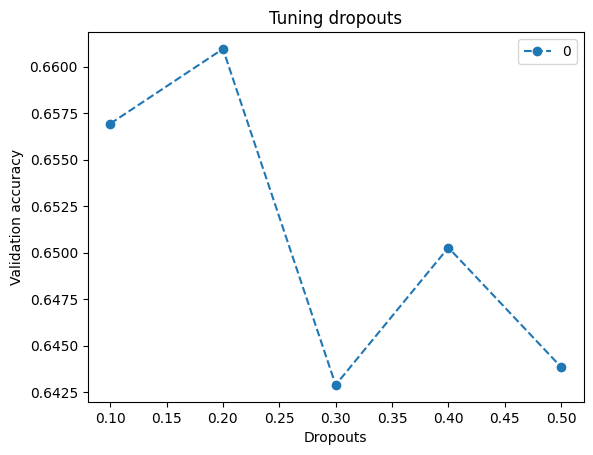

In [70]:
pd.DataFrame(dropout_accuracies.values(), index=dropout_accuracies.keys()).plot(
    title="Tuning dropouts", xlabel="Dropouts", ylabel="Validation accuracy", style = "--o"
)